**LESSONS FROM EMPLOYEES WHO LEFT.**

**Introduction**


Employee attrition,also known as employee turnover is a matter of great concern to organizations and to the whole economy can be defined as the frequency at which employees leave an organization during a specific period of time.The 
departure of employees can have significant repercussions for an organization's performance and productivity.
According to Beardwell(2004),there are many factors that can lead to labour attrition within a company caused by either the employee or the employer. These factors include wage dissatisfaction, job performance, toxic work environments, and employee burnout.
Additionally, Armstrong (2010) emphasizes the costly nature of continued employee turnover, not only for organizations but also for the broader economy. Not only does employee attrition lead to financial implications but it also leads to negative effect on productivity,morale and efficiency within an organization.It is of great benefit to an organization to address these contributing factors that can help organizations reduce attrition rates and retain valuable talent.
The goal of this analysis is to utilize internal data from a company to determine risk factors associated with employee attrition.By analyzing the data,this analysis aims to uncover patterns and trends that provide insights into the causes of attrition in an organization.The findings of this analysis will greately contribute to a better understanding  of the factors influencing employee attrition and help in the development of targeted interventions and reduce talent attrition.

**Data**

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Integrated_CA2_Dataset.csv')
print(f"This data has {df.shape[0]} rows and {df.shape[1]} columns")
print(df.info())
df.head()


This data has 1470 rows and 35 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

This dataset comprises 1,470 data entries, each representing a distinct employee, with 35 variables detailing various characteristics of these individuals. Importantly, the dataset is complete, with no missing values present.

In [ ]:
# Dropping any duplicates in this dataset
df.drop_duplicates(inplace=True)

In [ ]:
# Looking at  some of the variables that may not be neccessary in this analysis
print(df['Over18'].unique())
print(df['StandardHours'].unique())
print(df['EmployeeCount'].unique())

['Y']
[80]
[1]


In [ ]:
# Dropping some of the variables that have no importance in explaining employees careers
df=df.drop(['Over18','StandardHours','EmployeeCount','EmployeeNumber','Education'],axis=1)


In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [ ]:
df.shape

(1470, 30)

**Methods**

**Data visualization**


To unveil meaningful patterns in this analysis of employee attrition, statistical plots were used to visually capture and show trends within the data. These plots served as powerful tools, enabling the identification of potential relationships, trends, and associations between the target variable, Attrition, and various factors. By using these graphical representations, a comprehensive exploration of the data was conducted, facilitating the discovery of significant variables that may influence attrition within the organization. This approach fostered a deeper understanding of the underlying dynamics and potential predictors of employee attrition, aiding in the formulation of informed strategies to mitigate attrition rates and enhance employee retention.

**Analysis of the attrition**


This analysis concentrates on attrition, particularly investigating the instances of employees who have exited the organization. The key purpose of delving into attrition is to understand and learn from the motivations and circumstances that prompted these employees to leave, with the aim to leverage these findings to enhance future employee retention initiatives.

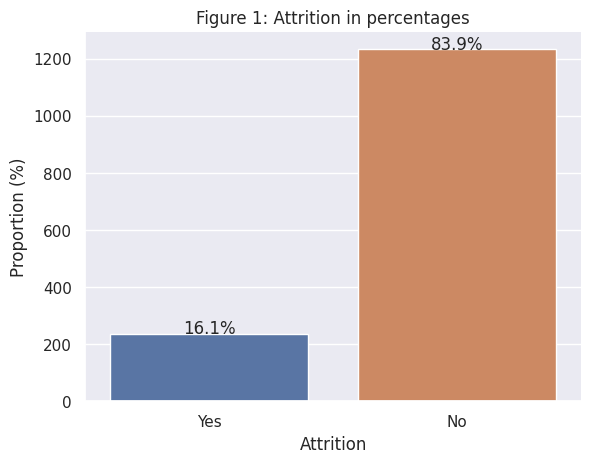

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataframe is called 'df' and the column is 'attrition'
ax = sns.countplot(data=df, x='Attrition')

# Calculate the percentages
total = len(df['Attrition'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')

# Set the y-axis label as percentage
ax.set_ylabel('Proportion (%)')
ax.set_title('Figure 1: Attrition in percentages')
# Remove the frame at the top and right side
sns.despine()

# Show the plot
plt.show()



Figure 1 reveals that the employees who departed from the organization constituted 16.1% of the total employee population.

**Feature-variable relationship**

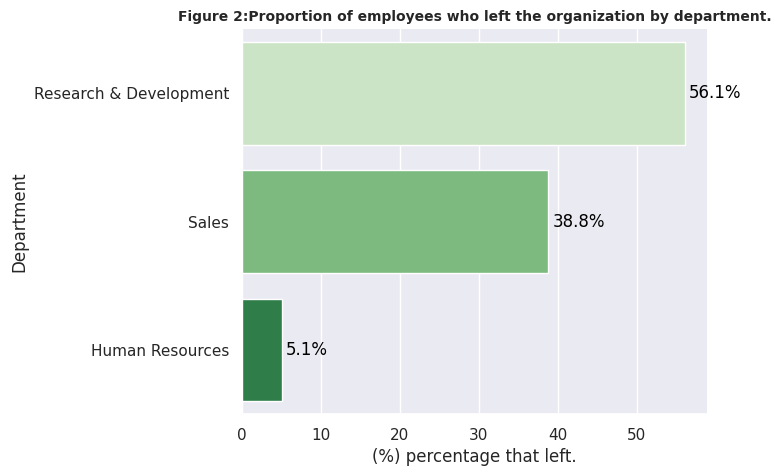

In [ ]:
# Filter the dataframe to include only employees with attrition 'Yes'
attrition_yes_df = df[df['Attrition'] == 'Yes']

# Calculate the percentage of attrition 'Yes' per department
attrition_percentage = attrition_yes_df.groupby('Department').size() / len(attrition_yes_df) * 100

# Sort the departments based on the attrition percentage in descending order
attrition_percentage_sorted = attrition_percentage.sort_values(ascending=False)

# Create a color palette for the bars with a gradient of green shades
n_departments = len(attrition_percentage_sorted)
colors = sns.color_palette('Greens', n_departments)

# Create a Figure and Axes object
fig, ax = plt.subplots(figsize=(6, 5))

# Create the horizontal barplot using the Axes object
sns.barplot(x=attrition_percentage_sorted.values, y=attrition_percentage_sorted.index, palette=colors, ax=ax)

# Set the x-axis label as percentage
ax.set_xlabel('(%) percentage that left.')

# Set the title of the plot
ax.set_title('Figure 2:Proportion of employees who left the organization by department.',fontsize=10,weight='bold')

# Remove the frame at the top and right side
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add percentages on top of each bar
for i, v in enumerate(attrition_percentage_sorted.values):
    ax.text(v + 0.5, i, f'{v:.1f}%', color='black', va='center')

# Show the plot
plt.show()






Figure 2 potrayed the share of employees who left per department. The Research and Development department emerged as the frontrunner, with a significant share of 56.1% of employees departing from their roles. Following closely behind, the Sales department trailed with a share of 38.8%. Remarkably, the Human Resources department exhibited exceptional employee retention, with a minimal share of only 5.1% of employees that left. These findings highlight the varying proportions of employee turnover across different departments within the organization.

<ipython-input-96-e7c87371b4fe>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


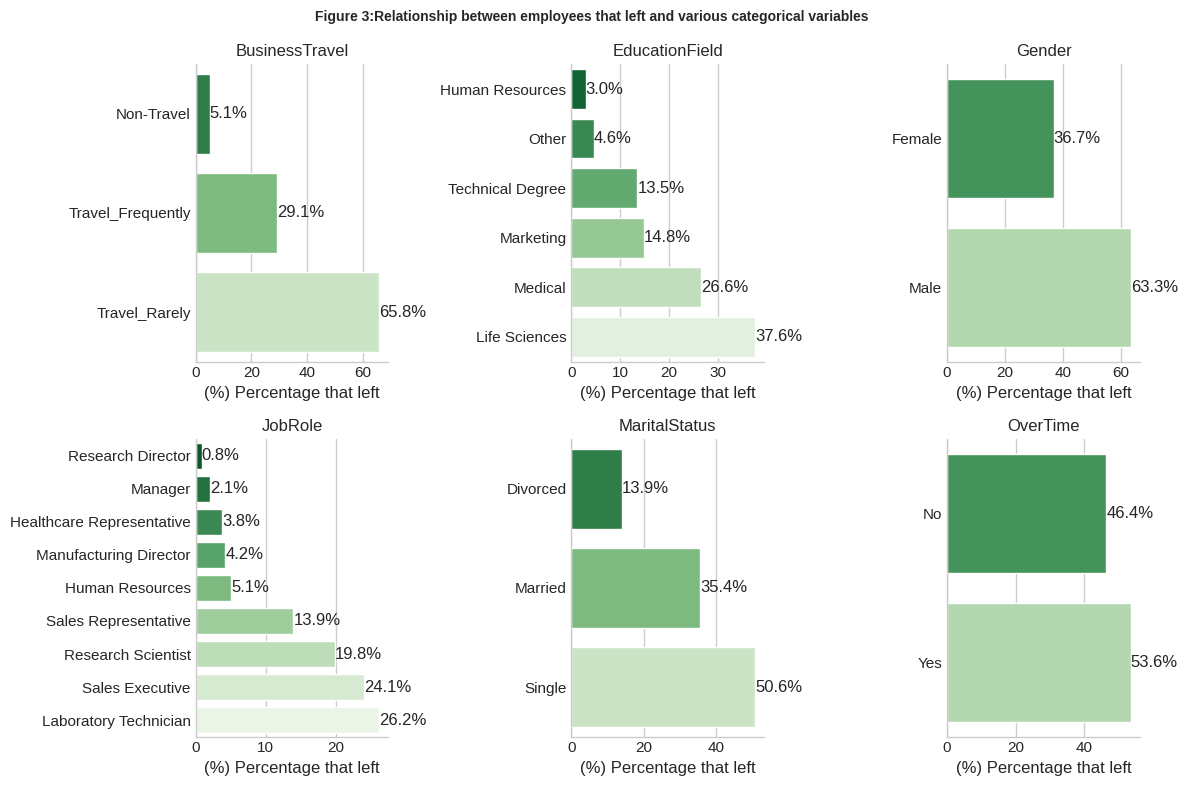

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the plot style to a theme similar to The Economist
plt.style.use('seaborn-whitegrid')

# Filter the dataframe to include only employees with attrition 'Yes'
attrition_yes_df = df[df['Attrition'] == 'Yes']

# Define the categorical variables to plot
categorical_variables = ['BusinessTravel', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

# Calculate the number of rows and columns for the subplots
n_rows = 2
n_cols = 3

# Create the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))

# Adjust the spacing between the subplots
fig.subplots_adjust(hspace=0.5, top=0.88)

# Set the overall title of the figure
fig.suptitle('Figure 3:Relationship between employees that left and various categorical variables', fontsize=10, weight='bold')

# Flatten the axes array to iterate over the subplots
axes = axes.flatten()

# Iterate over the categorical variables and create barplots for each variable
for i, variable in enumerate(categorical_variables):
    # Calculate the percentage of each category within the variable
    category_percentage = attrition_yes_df[variable].value_counts(normalize=True) * 100

    # Sort the categories based on their percentage in descending order
    category_percentage_sorted = category_percentage.sort_values(ascending=False)

    # Create a color palette for the bars with a gradient of green shades
    n_categories = len(category_percentage_sorted)
    colors = sns.color_palette('Greens', n_categories)

    # Create the horizontal barplot for the current variable using the corresponding subplot
    ax = sns.barplot(x=category_percentage_sorted.values, y=category_percentage_sorted.index, palette=colors, ax=axes[i])

    # Set the x-axis label as percentage
    ax.set_xlabel('(%) Percentage that left')

    # Set the title of the subplot as the variable name
    ax.set_title(variable)

    # Remove the frame at the top and right side for each subplot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Invert the y-axis to display the categories in descending order
    ax.invert_yaxis()

    # Add percentages on top of the bars
    for j, patch in enumerate(ax.patches):
        percentage = category_percentage_sorted.values[j]
        x = patch.get_width()
        y = patch.get_y() + patch.get_height() / 2
        ax.text(x, y, f'{percentage:.1f}%', ha='left', va='center')

# Hide any unused subplots if there are fewer variables than the number of subplots
for j in range(len(categorical_variables), n_rows * n_cols):
    fig.delaxes(axes[j])

# Adjust the layout to ensure the subplots are well-spaced
fig.tight_layout()

# Show the plot
plt.show()


Figure 3 visually presents the distribution of employees who left the organization, categorized according to various factors. These factors were treated as categorical variables, shedding light on different facets of employee attrition. The following insights were derived from the analysis:




*   
Insights obtained from Figure 3 show a significant relationship between employee attrition and travel frequency. Specifically, employees who rarely traveled exhibited a significantly higher proportion of departures, accounting for 65.8% of the total departures. Conversely, employees who did not travel at all displayed the lowest departure rate, representing a mere 5.1% of the of the total departures. These findings underscore the impact of travel frequency on employee attrition, highlighting the potential significance of travel-related factors in retention strategies.

*   When examining the education field of employees, it became clear from Figure 3 that the Life Sciences sector experienced the highest proportion of departures, accounting for 37.6% of the workforce departures. In contrast, the Human Resources sector exhibited the lowest proportion of departures, with just 3.0% of employees choosing to leave. These findings shed light on the differing attrition rates across various educational backgrounds.



*   Based on the insights derived from Figure 3, it is evident that males had the highest proportion of departures, comprising 63.3% of the total. In contrast, females accounted for a trailing proportion of departures at 36.7%. These findings highlight a significant disparity in attrition rates between genders, emphasizing the higher likelihood of males leaving the organization compared to females.
*Based on the findings presented in Figure 3, the occupation of laboratory technician had the highest share of employees who left their jobs, accounting for 26.2% of departures. Following closely behind, sales representatives had a share of 24.1% in employee departures. On the other hand, roles such as managers and research directors exhibited the lowest share of employees who chose to leave the organization. These insights shed light on the varying proportions of employee attrition across different occupational roles


* Figure 3 reveals that single employees had the highest proportion of departures among the marital status categories, accounting for 50.6% of the total. Interestingly, married individuals closely trailed behind with a departure rate of 35.4%, indicating a comparable attrition proportion. In contrast, divorcees exhibited the lowest share, representing a departure rate of only 13.9%. These findings underscore the relationship between marital status and employee attrition, with single employees demonstrating a higher propensity to leave the organization compared to married individuals, while divorcees exhibit the lowest departure rate.

*   According to Figure 3, the proportion of employees who left the organization was higher among those who worked overtime, accounting for 53.6% of departures. However, it is important to note that the figure was relatively close to the proportion of employees who did not work overtime, which stood at 46.4%. This suggests that while there exists a greater share of departures  among employees who worked overtime, there is still a significant proportion of employees who chose to leave despite not working overtime









<ipython-input-97-94bb3da61db2>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


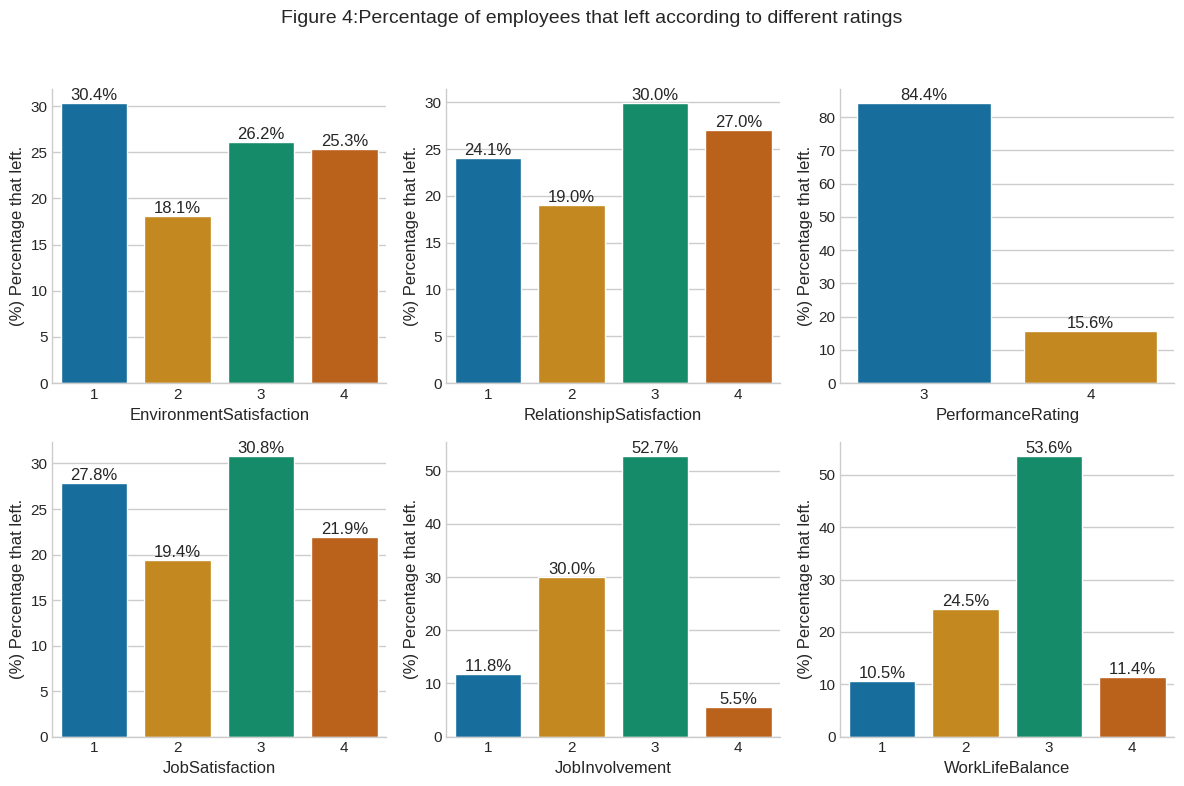

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df' with the columns 'Attrition', 'Age', 'Variable1', 'Variable2', 'Variable3', 'Variable4', 'Variable5'

# Set the plot style to match The Economist theme
plt.style.use('seaborn-whitegrid')
sns.set_palette("colorblind")

# Define the list of variables
variables = ['EnvironmentSatisfaction', 'RelationshipSatisfaction', 'PerformanceRating', 'JobSatisfaction', 'JobInvolvement', 'WorkLifeBalance']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through each variable and create bar plots
for i, variable in enumerate(variables):
    ax = axes[i]

    # Filter the DataFrame for 'Attrition' == 'Yes'
    attrition_yes = df[df['Attrition'] == 'Yes']

    # Calculate the percentage of each category
    category_percentages = (attrition_yes[variable].value_counts(normalize=True) * 100).sort_index()

    # Create the bar plot
    sns.barplot(x=category_percentages.index, y=category_percentages.values, ax=ax)

    # Add percentage labels on top of each bar
    for j, value in enumerate(category_percentages.values):
        ax.text(j, value, f'{value:.1f}%', ha='center', va='bottom')

    # Set the labels and title for each subplot
    ax.set_xlabel(variable)
    ax.set_ylabel('(%) Percentage that left.')
    # ax.set_title(f'{variable}')

    # Remove spines on the top and right
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Set the x-axis tick labels to be vertical
    ax.set_xticklabels(category_percentages.index, rotation=0)

# Remove empty subplots if necessary
if len(variables) < len(axes):
    for j in range(len(variables), len(axes)):
        fig.delaxes(axes[j])

# Add the main title above the subplots with proper spacing
fig.suptitle('Figure 4:Percentage of employees that left according to different ratings', fontsize=14, y=0.98)

# Adjust the layout
fig.tight_layout(rect=[0, 0, 1, 0.95])

# Display the subplots
plt.show()


Figure 4 displays the proportion of employees who left the organization in relation to their different rating scores for environment satisfaction, relationship satisfaction, and job satisfaction. Interestingly, no clear trend emerged from the analysis of these factors. The data does not indicate a strong relationship between the satisfaction ratings and the likelihood of employees leaving. This suggests that factors other than these specific satisfaction measures may be influencing employees' decisions to depart from the organization. Further investigation is required to better understand the complexities surrounding employee attrition and the contributing factors beyond the satisfaction ratings measured in this study.

Contrary to the absence of a clear trend in job involvement,work life balance and performance rating Figure 4 reveals noteworthy insights when considering performance rating, job involvement, and work-life balance. Specifically, employees with a rating of 3 in these areas demonstrated the highest proportion of departures from the organization. This indicates a potential relationship between a performance rating of 3 and the decision to leave. Further analysis and exploration of the underlying factors contributing to this phenomenon are necessary to gain a deeper understanding of the dynamics at play.


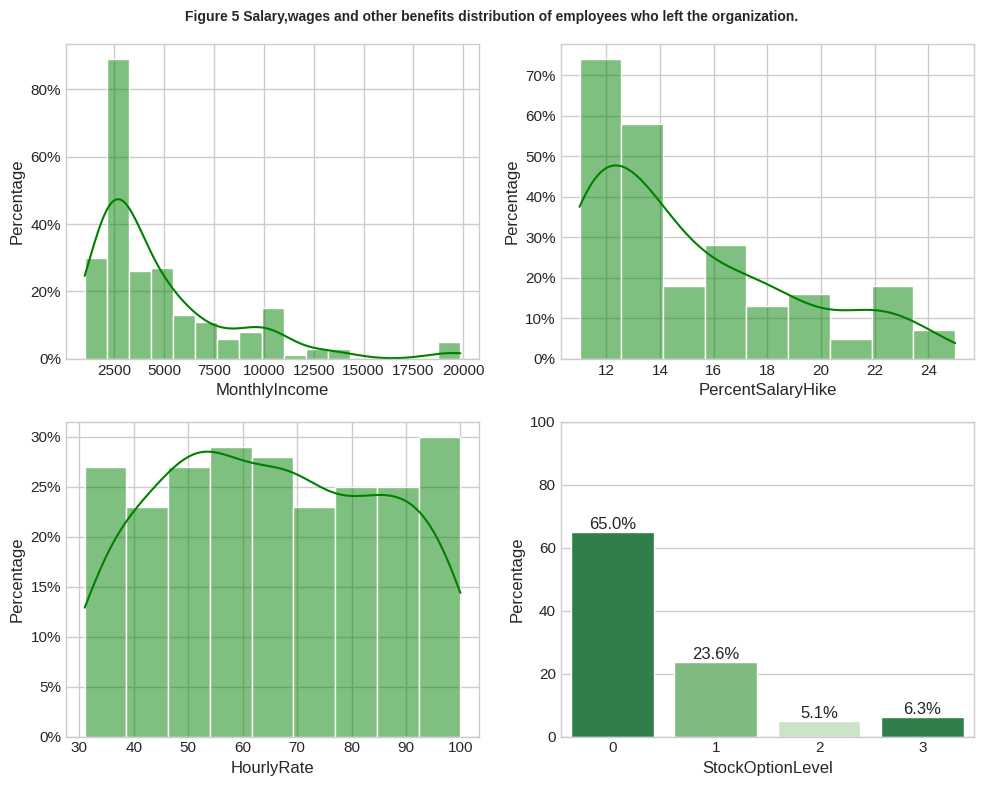

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df' with the columns 'Attrition', 'Variable1', 'Variable2', 'Variable3', 'StockOptionLevel', ..., 'VariableN'
# Assuming you want to select variables 'Variable1', 'Variable2', 'Variable3', and 'StockOptionLevel'
selected_variables = ['MonthlyIncome', 'PercentSalaryHike', 'HourlyRate', 'StockOptionLevel']

# Filter the DataFrame to include only those who left
df_left = df[df['Attrition'] == 'Yes']

# Set up the figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Define different shades of green for the bar plot
colors = sns.color_palette("Greens_r", n_colors=len(selected_variables)-1)

# Iterate through the selected variables and create subplots
for i, variable in enumerate(selected_variables):
    ax = axes[i]

    # Bar plot for 'StockOptionLevel'
    if variable == 'StockOptionLevel':
        category_percentages = (df_left[variable].value_counts(normalize=True) * 100).sort_index()
        sns.barplot(x=category_percentages.index, y=category_percentages.values, ax=ax, palette=colors)
        ax.set_xlabel(variable)
        ax.set_ylabel('Percentage')
        ax.set_ylim(0, 100)

        # Add percentage labels on top of each bar
        for j, value in enumerate(category_percentages.values):
            ax.text(j, value, f'{value:.1f}%', ha='center', va='bottom')
    else:
        # Distribution plot
        sns.histplot(data=df_left, x=variable, kde=True, ax=ax, color='green')
        ax.set_xlabel(variable)
        ax.set_ylabel('Percentage')
        ax.set_ylim(0, None)
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{int(x)}%'))
plt.suptitle("Figure 5 Salary,wages and other benefits distribution of employees who left the organization.", fontsize=10, fontweight='bold')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()




Figure 5 presented an analysis of employee compensation, encompassing wages, salaries, and additional benefits, such as various levels of stock options and percentage increases in salary. Interestingly, no discernible pattern emerged that linked employee attrition to the hourly rates they received.

The distribution of percentage salary hikes and monthly income exhibited positive skewness. This suggested a higher probability that employees who left the organization were earning lower monthly incomes and receiving smaller salary raises.

Additionally, the data suggested a higher probability that a significant proportion of those who left had been allocated lower levels of stock options. This indicated that the probability of an employee leaving the organization could potentially be influenced by the level of stock options they received.






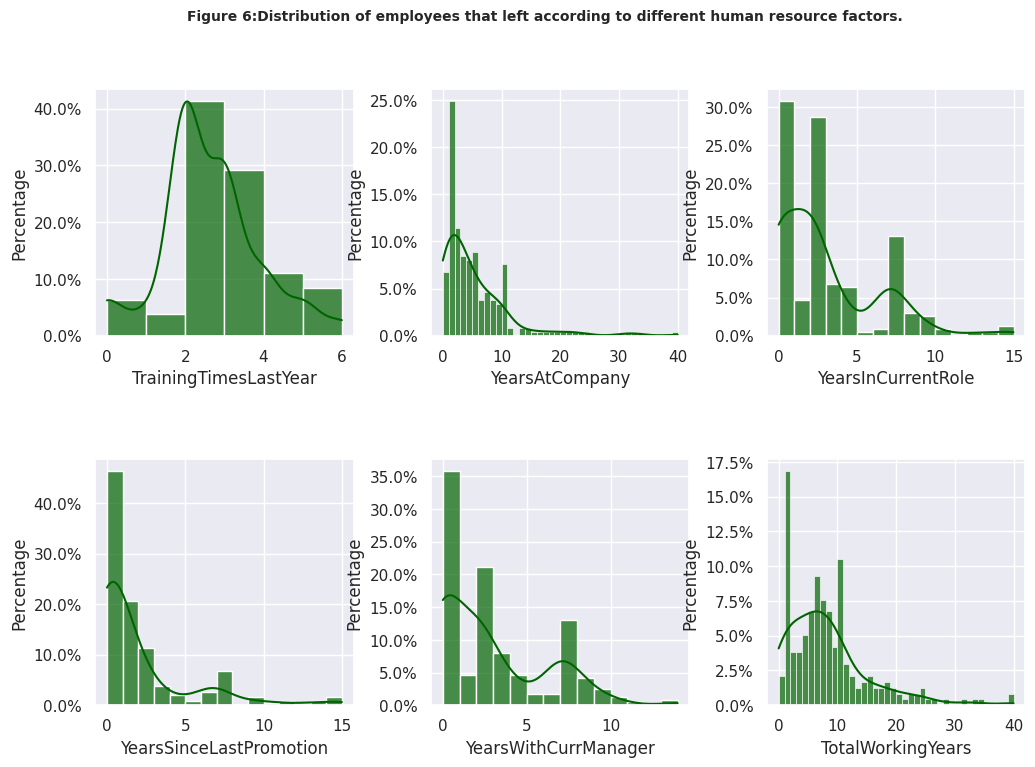

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker



# Select the variables to plot
variables = ['TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'TotalWorkingYears']

# Filter the DataFrame for 'Attrition' == 'Yes'
attrition_yes_df = df[df['Attrition'] == 'Yes']

# Set the plot style
sns.set(style="darkgrid")

# Create the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# Iterate over the variables and create distribution plots
for i, variable in enumerate(variables):
    ax = axes[i // 3, i % 3]  # Access the correct subplot based on the grid

    # Create the distribution plot
    sns.histplot(data=attrition_yes_df, x=variable, ax=ax, kde=True, color='darkgreen', stat="density", common_norm=False, binwidth=1, alpha=0.7)

    # Set the y-axis as percentages
    ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))

    # Set the labels and title for each subplot
    ax.set_xlabel(variable)
    ax.set_ylabel('Percentage')
    # ax.set_title(f'Distribution of {variable} (Attrition: Yes)')

# Remove any unused subplots if the number of variables is less than 6
if len(variables) < 6:
    for i in range(len(variables), 6):
        fig.delaxes(axes[i // 3, i % 3])

# Adjust the spacing between subplots
fig.subplots_adjust(hspace=0.5, wspace=0.3)
fig.suptitle('Figure 6:Distribution of employees that left according to different human resource factors.', fontsize=10, fontweight='bold', y=0.98)
# Display the plot
plt.show()



Figure 6 illustrates the distribution of various human resource parameters associated with employees who have left the company. A discernable pattern is elusive when considering factors such as the number of training sessions attended in the previous year, the duration in the current role, and the length of time under the current manager.

However, a noteworthy trend emerges when analyzing the overall tenure at the company, the length of time since the last promotion, and the total working years. These factors exhibit a positive skew, indicating a higher likelihood of employees leaving the company when these durations are shorter. In other words, employees with fewer years of service, less recent promotions, and a shorter total career span were more prone to exiting the company.

**Feature engineering**

Machine learning presents a highly suitable approach for assessing the risk of employee attrition within an organization. By scrutinizing various characteristics of individuals, organizations can efficiently arrive at informed decisions regarding hiring strategies and incentive offerings. Ensuring precise employee classifications is crucial for achieving reliable outcomes. To construct an accurate machine learning model, the dataset must be subjected to a process of data re-engineering specifically tailored for machine learning purposes. The dataset employed in this analysis comprises numerous categorical variables that necessitate expert domain knowledge for effective re-engineering.

In [ ]:
# The unique job roles of employees
df['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

The JobRole variable contains many categorical variables.This variable is best reduced based on the core task that the employee undertakes.Therefore,we reduced the jobrole into 3 thus:research,management and sales.This prevented the curse of dimensionality.

In [ ]:
df['JobRole']=df['JobRole'].replace({'Research Scientist':'Research','Laboratory Technician':'Research','Research Director':'Research', 'Manager':'Management','Manufacturing Director':'Management','Human Resources':'Management',
               'Healthcare Representative':'Sales','Sales Executive':'Sales','Sales Representative':'Sales'})

The education field variable in the dataset contained numerous categories, which posed challenges in terms of complexity and interpretability. To simplify the analysis, a pragmatic approach was taken by grouping the categories into two broad classifications: STEM (Science, Technology, Engineering, and Mathematics) and Others.

In [ ]:
df['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [ ]:
df['EducationField']=df['EducationField'].replace({'Life Sciences':'STEM','Medical':'STEM','Technical Degree':'STEM','Other':'Other','Marketing':"Other",'Human Resources':'Other'})

**Separation of classes**

Identifying and predicting attrition is of great importance in various domains, particularly in the domains of strategic planning and human resource management. Accurate classification of attrition cases relies on the ability to effectively separate distinct classes, such as "Attrition='Yes'" and "Attrition='No'". To accomplish this, we employed Principal Component Analysis (PCA) and Linear Discriminant Analysis (LDA) as powerful dimensionality reduction techniques. By leveraging the capabilities of PCA and LDA, our aim is to evaluate the classification power of the data used in our analysis.

**Principal Component Analysis.**

In this analysis, we used Principal Component Analysis (PCA) to gain  insights into the classification power of our data in its accurate prediction of attrition. Through the application of PCA, we effectively addressed the complexity of high-dimensional data by reducing its dimensionality. By identifying the most informative principal components, we were able to capture the essential patterns and structure within the data. Additionally, we employed data visualization techniques to explore the relationship between attrition and the first two principal components. Utilizing a distinct color scale, we visualized the difference between the two attrition classes, namely "Yes" and "No." This visual representation allowed us to gain valuable information on how effectively the data can differentiate and classify the two attrition classes.

In [ ]:
Attrition=df['Attrition']

In [ ]:
# Converting the categorical variables into numeric through one-hot encoding
df = pd.get_dummies(df.drop('Attrition',axis=1),drop_first=True)

In [ ]:
df.head()

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_STEM,Gender_Male,JobRole_Research,JobRole_Sales,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,1,0,1,1,0,0,1,0,1,1
1,49,279,8,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,1,0,1,0,1,1,1,0,1,0,0
2,37,1373,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,0,1,1,0,0,1,1,0,0,1,1
3,33,1392,3,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,1,0,1,0,1,0,1,0,1,0,1
4,27,591,2,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,1,1,0,1,1,1,0,1,0,0


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Separate numerical and categorical variables
numerical_cols = df.select_dtypes(include='int64').columns.tolist()
categorical_cols = df.select_dtypes(include='uint8').columns.tolist()

# Preprocess numerical variables
numerical_data = df[numerical_cols]
scaler = StandardScaler()
scaled_numerical_data = scaler.fit_transform(numerical_data)
scaled_numerical_df = pd.DataFrame(scaled_numerical_data, columns=numerical_cols)

# Combine numerical and categorical data
combined_data = pd.concat([scaled_numerical_df, df[categorical_cols]], axis=1)

# Perform PCA
pca = PCA(n_components=2)  # Adjust the number of components as needed
pca_array = pca.fit_transform(combined_data)


In [ ]:
###Creating a PCA Dataframe
pca_df = pd.DataFrame({f"pca_feature_{i+1}": pca_array[:, i] for i in range(pca_array.shape[1])}, index=Attrition)


In [ ]:
pca_df=pca_df.reset_index()

In [ ]:
pca_df.head()

,Attrition,pca_feature_1,pca_feature_2
0,Yes,-0.253148,-1.746129
1,No,0.718687,2.615737
2,Yes,-2.433608,-1.153525
3,No,-0.976094,-0.313209
4,No,-1.791607,-1.367043


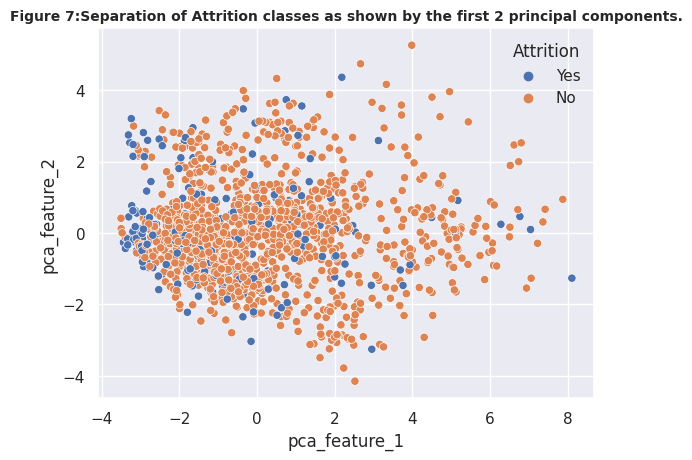

In [ ]:
# Create the scatter plot with hue
sns.scatterplot(x='pca_feature_1', y='pca_feature_2', hue='Attrition', data=pca_df)
# the title
plt.title('Figure 7:Separation of Attrition classes as shown by the first 2 principal components.',fontsize=10, fontweight='bold')
# Show the plot
plt.show()

Figure 7 illustrates the ability of the first two principal components to distinguish between employee attrition classes. The visual representation clearly demonstrates that there is some overlap among the classes, indicating potential challenges for machine learning algorithms in accurately separating these classes. This overlap can be attributed to inherent issues in the dataset, such as class imbalance, which may hinder the algorithm's ability to effectively discriminate between different attrition classes.

**Linear Discriminant Analysis**

In this analysis, we employed Linear Discriminant Analysis (LDA) to gain insights into the classification power of our data and its accurate prediction of attrition. LDA works by reducing the dimensions of the data that maximizes the separation between different classes or categories. It achieves this by calculating scatter matrices to separate classes. By performing an eigenvalue decomposition on these matrices, LDA identifies linear discriminants that capture the most discriminative information. The data is then projected onto these linear discriminants, resulting in a transformed space where classification algorithms can be applied to accurately predict class membership. Overall, LDA reduces dimensionality while maximizing class separability, improving the classification power of the data. This allowed us to identify the most relevant discriminatory information and capture the essential patterns and structure within our data.We then used data visualization techniques to visually explore the relationship between attrition and the transformed lower-dimensional space obtained through LDA. By using a distinct color scale, we effectively visualized the distinction between the "Yes" and "No" attrition classes. This visualization provided valuable information on the data's ability to discriminate and accurately classify the two attrition groups.

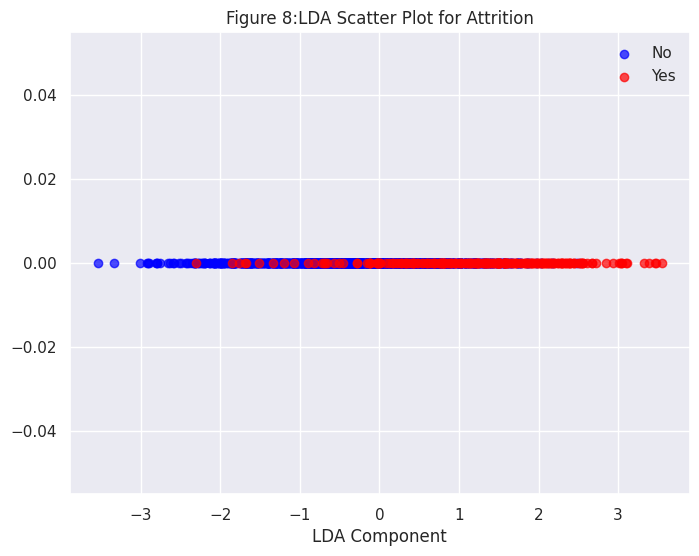

In [ ]:
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(df)

# Apply LDA with 1 component
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X_std, Attrition.map({'No': 0, 'Yes': 1}))

# Plot the results
plt.figure(figsize=(8, 6))

# Plot points for class 'No'
plt.scatter(X_lda[Attrition == 'No'], [0] * sum(Attrition == 'No'), color='blue', alpha=0.7, label='No')

# Plot points for class 'Yes'
plt.scatter(X_lda[Attrition == 'Yes'], [0] * sum(Attrition == 'Yes'), color='red', alpha=0.7, label='Yes')

plt.xlabel('LDA Component')
plt.title('Figure 8:LDA Scatter Plot for Attrition')
plt.legend()
plt.show()


Figure 8 presents the results of applying Linear Discriminant Analysis (LDA) to assess the predictive power of the data for employee attrition. The LDA plot visually highlights that the data exhibits significant overlap among the data points. This overlap signifies the challenge in utilizing the available features to accurately predict the attrition of employees. Given the observed overlap in the LDA plot, it suggests that the data may not provide sufficient discriminatory information for reliable attrition prediction.


**Feature selection**


In order to mitigate the potential issue of overfitting in the classification model used to predict employee attrition, a careful feature selection process was conducted due to the large number of features in the dataset. To address this, a correlation analysis was performed to identify and eliminate highly correlated features.

The analysis involved evaluating the correlation between features using appropriate metrics based on their data types. Pearson's R correlation coefficient was used for pairwise combinations of continuous-continuous variables. For combinations of categorical and continuous variables, the Correlation Ratio was utilized. In cases where both variables were categorical, Cramer's V was employed to measure the correlation.

By eliminating one feature from each pair of highly correlated variables, the dataset was effectively reduced while preserving the relevant information necessary for the classification task. This feature selection step helped to alleviate the potential issue of overfitting, as it reduced the complexity and redundancy within the dataset, allowing the machine learning model to focus on the most informative features.

By employing this approach, the classification model can achieve improved generalization performance by reducing the risk of overfitting and enhancing the model's ability to accurately predict employee attrition on unseen data.



In [ ]:
df['Attrition']=Attrition.map({'No':0,'Yes':1})

In [ ]:
df.head()

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_STEM,Gender_Male,JobRole_Research,JobRole_Sales,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Attrition
0,41,1102,1,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,1,0,1,1,0,0,1,0,1,1,1
1,49,279,8,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,1,0,1,0,1,1,1,0,1,0,0,0
2,37,1373,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,0,1,1,0,0,1,1,0,0,1,1,1
3,33,1392,3,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,1,0,1,0,1,0,1,0,1,0,1,0
4,27,591,2,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,1,1,0,1,1,1,0,1,0,0,0


In [ ]:
!pip install dython[nominal]==0.6.7
!pip install --upgrade numpy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

from dython.nominal import correlation_ratio, cramers_v

# Select categorical and continuous columns
categorical_columns = df.select_dtypes(include='uint8').columns
continuous_columns = df.select_dtypes(include='int64').columns

# Compute correlations using appropriate measures
combined_corr = pd.DataFrame(index=categorical_columns, columns=continuous_columns)

# Compute correlation for categorical-continuous combinations using Correlation Ratio
for cat_col in categorical_columns:
    for cont_col in continuous_columns:
        corr = correlation_ratio(df[cat_col].astype('category'), df[cont_col])
        combined_corr.loc[cat_col, cont_col] = corr

# Compute correlation for categorical-categorical combinations using Cramer's V
for cat_col1 in categorical_columns:
    for cat_col2 in categorical_columns:
        if cat_col1 != cat_col2:
            corr = cramers_v(df[cat_col1].astype('category'), df[cat_col2].astype('category'))
            combined_corr.loc[cat_col1, cat_col2] = corr

# Compute correlation for continuous-continuous combinations using Pearson's R
continuous_corr = df[continuous_columns].corr(method='pearson')
combined_corr.update(continuous_corr)

# Set threshold for correlation
threshold = abs(0.3)

# Filter variables with correlations above threshold
filtered_corr = combined_corr[abs(combined_corr) > threshold].stack().reset_index()
filtered_corr.columns = ['Variable 1', 'Variable 2', 'Correlation']

# Display the result DataFrame
filtered_corr


,Variable 1,Variable 2,Correlation
0,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,0.750978
1,BusinessTravel_Travel_Rarely,BusinessTravel_Travel_Frequently,0.750978
2,Department_Research & Development,Department_Sales,0.905195
3,Department_Research & Development,EducationField_STEM,0.409262
4,Department_Research & Development,JobRole_Research,0.629377
5,Department_Research & Development,JobRole_Sales,0.656716
6,Department_Sales,Department_Research & Development,0.905195
7,Department_Sales,EducationField_STEM,0.352466
8,Department_Sales,JobRole_Research,0.570439
9,Department_Sales,JobRole_Sales,0.750786


The table above represents correlation values that are above 30%

In [ ]:
df.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_STEM', 'Gender_Male', 'JobRole_Research',
       'JobRole_Sales', 'MaritalStatus_Married', 'MaritalStatus_Single',
       'OverTime_Yes', 'Attrition'],
      dtype='object')

Drropping some of the variables that are highly correlated with other variables to avoid multicollinearlity which results into overfitting hence poor model performance.

In [ ]:
df=df.drop(['Department_Research & Development', 'Department_Sales','BusinessTravel_Travel_Rarely','MaritalStatus_Single'],axis=1)

**Predictive modelling**

To predict employees at risk of leaving the organization, a machine learning model was employed. However, according to Figure 1the dataset exhibited a significant class imbalance. Specifically, the dependent variable contained only 16.1% of employees who left (Attrition='Yes') and 83.9% of those who did not leave (Attrition='No'). This class imbalance posed a potential risk for the machine learning model, as it could lead to poor classification performance for the minority class. To address this issue, class weights were adjusted to be inversely proportional to the class frequencies in the input data. This adjustment was applied to all algorithms that included a parameter for class weights. By accounting for the unbalanced turnover status proportions, the adjusted class weights aimed to mitigate the impact of class imbalance and improve the model's ability to classify the minority class accurately.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
# splitting target column from features
X = df.drop('Attrition', axis=1)
y = df.Attrition


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=22)

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Assuming you have X (feature matrix) and y (target variable)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Instantiate the classification models
knn = KNeighborsClassifier()
logreg = LogisticRegression(class_weight='balanced', random_state=22)
svc = SVC(class_weight='balanced', random_state=22)

# Train the models
knn.fit(X_train, y_train)
logreg.fit(X_train, y_train)
svc.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn.predict(X_test)
y_pred_logreg = logreg.predict(X_test)
y_pred_svc = svc.predict(X_test)

# Calculate evaluation metrics for each model
accuracy_scores = [
    accuracy_score(y_test, y_pred_knn),
    accuracy_score(y_test, y_pred_logreg),
    accuracy_score(y_test, y_pred_svc)
]

precision_scores = [
    precision_score(y_test, y_pred_knn),
    precision_score(y_test, y_pred_logreg),
    precision_score(y_test, y_pred_svc)
]

recall_scores = [
    recall_score(y_test, y_pred_knn),
    recall_score(y_test, y_pred_logreg),
    recall_score(y_test, y_pred_svc)
]

f1_scores = [
    f1_score(y_test, y_pred_knn),
    f1_score(y_test, y_pred_logreg),
    f1_score(y_test, y_pred_svc)
]

# Create a table to display the results
models = ['K-Nearest Neighbors', 'Logistic Regression', 'Support Vector Classifier']
results = pd.DataFrame({'Model': models, 'Accuracy': accuracy_scores, 'Precision': precision_scores,
                        'Recall': recall_scores, 'F1 Score': f1_scores})

# Display the table
results


,Model,Accuracy,Precision,Recall,F1 Score
0,K-Nearest Neighbors,0.874150,0.583333,0.179487,0.274510
1,Logistic Regression,0.772109,0.329268,0.692308,0.446281
2,Support Vector Classifier,0.812925,0.366667,0.564103,0.444444


The table above presents the performance of various machine learning algorithms in predicting the label 'Attrition.' Based on the results, Support Vector Machine (SVM) and Logistic Regression demonstrate promising performance for classification tasks. In order to further enhance their accuracy, a Grid Search cross-validation technique was employed to determine the optimal parameters that would result in more accurate classifications

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Attrition', axis=1), df['Attrition'], test_size=0.1, random_state=42)

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 5, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Instantiate the SVC classifier with balanced class weights and probability estimation
svc = SVC(class_weight="balanced", probability=True, random_state=22)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=10)
grid_search.fit(X_train_norm, y_train)

# Print the best parameters and best score
# print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Get the best model from GridSearchCV
best_svc = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_svc.predict(X_test_norm)
print(best_svc)
# Print the classification report
print(classification_report(y_test, y_pred))
# BEST

Best Score:  0.8208760537707906
SVC(C=10, class_weight='balanced', probability=True, random_state=22)
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       124
           1       0.55      0.52      0.53        23

    accuracy                           0.86       147
   macro avg       0.73      0.72      0.72       147
weighted avg       0.85      0.86      0.86       147



              precision    recall  f1-score   support

           0       0.91      0.92      0.92       124
           1       0.55      0.52      0.53        23

    accuracy                           0.86       147
   macro avg       0.73      0.72      0.72       147
weighted avg       0.85      0.86      0.86       147



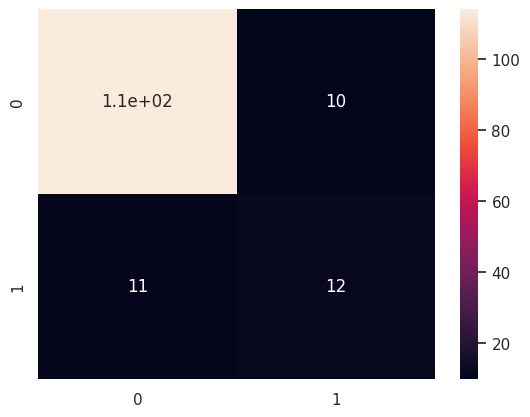

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_pred))


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Attrition', axis=1), df['Attrition'], test_size=0.1, random_state=42)

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 5, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Instantiate the Logistic Regression classifier
logreg = LogisticRegression(random_state=22)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=10)
grid_search.fit(X_train_norm, y_train)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Get the best model from GridSearchCV
best_logreg = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_logreg.predict(X_test_norm)

# Print the classification report
print(classification_report(y_test, y_pred))


Best Parameters:  {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score:  0.8767942583732058
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       124
           1       0.78      0.30      0.44        23

    accuracy                           0.88       147
   macro avg       0.83      0.64      0.68       147
weighted avg       0.87      0.88      0.85       147



              precision    recall  f1-score   support

           0       0.88      0.98      0.93       124
           1       0.78      0.30      0.44        23

    accuracy                           0.88       147
   macro avg       0.83      0.64      0.68       147
weighted avg       0.87      0.88      0.85       147



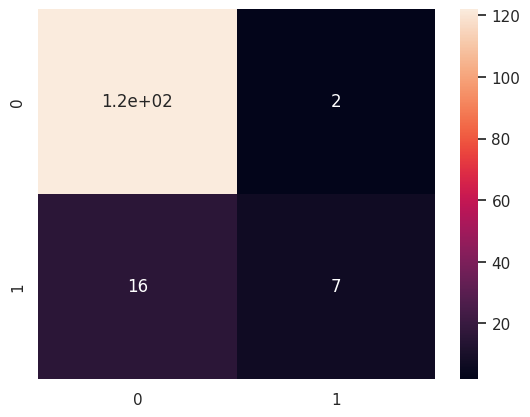

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_pred))

The classification results revealed that the Support Vector Machine (SVM) classifier outperformed the Logistic Regression model in accurately classifying employees who left the organization. The SVM classifier correctly classified 12 workers who left the organization, while the Logistic Regression model only identified 7 workers accurately.

This indicates that the SVM classifier excels in identifying employees at the highest risk of leaving the organization which would avert losses to the organisation and the economy as a whole.

**K-Fold Cross validation**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np

# Defining the number of splits and the random state for reproducibility
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initializing an empty list to store the accuracy scores for each fold
accuracies = []

# Iterating over the folds
for train_index, test_index in kf.split(X):
    
    # Splitting the data into training and testing sets for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Training an SVM model on the training data for this fold
    svm = SVC(C=10, class_weight='balanced', probability=True, random_state=22)
    svm.fit(X_train, y_train)
    
    # Predicting the labels for the testing data for this fold
    y_pred = svm.predict(X_test)
    
    # Calculating the accuracy of the model for this fold
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print('Accuracy for fold:', accuracy)

# Calculating the mean and standard deviation of the accuracy scores across all folds
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)

# Print the mean and standard deviation of the accuracy scores
print('Mean accuracy:', mean_accuracy)
print('Standard deviation of accuracy:', std_accuracy)


Accuracy for fold: 0.6870748299319728
Accuracy for fold: 0.6496598639455783
Accuracy for fold: 0.6224489795918368
Accuracy for fold: 0.564625850340136
Accuracy for fold: 0.5884353741496599
Mean accuracy: 0.6224489795918366
Standard deviation of accuracy: 0.04339901471492949



The mean accuracy across all folds in this analysis demonstrates the model's ability to generalize effectively to unseen data, as it consistently delivered high performance across various folds.

**Conclusion**


In conclusion, this analysis of the provided data has provided meaningful insights into the causes that may trigger an employee to leave the organisation leading to losses to the organisation and the whole economy.

However, the dataset used in this analysis had a limited representation of employees who left the organization. In order to enhance the accuracy  of the predictions, it is very important to collect more data points on employees who left the organization. This will enable a deeper understanding of the underlying factors contributing to employee attrition and enhance the model's ability to accurately identify employees who are likely to leave as well as potential employees, who might be at risk of leaving the organization.

By increasing the sample size of employees who left the organization, the machine learning model will have access to a wider range of examples and patterns, leading to more accurate predictions. This, in turn, will assist organizations in implementing  measures and strategies to solve the problem of employee turnover thus minimising disruptions, and maximizing employee retention.



**References**


Armstrong, M. (2012). Armstrong's Handbook of Human Resource Management Practice. 12th ed. London: Kogan Page.

Beardwell, I., Holden, L., & Claydon, T. (2004). Human Resource Management; A Contemporary Approach. 4th Ed. Prentice Hall.

Fisher, R. A. (1936). The use of multiple measurements in taxonomic problems. Annals of Eugenics, 7(2), 179–188.

McGinnis, W., et al. (2018). Category Encoders: a scikit-learn-contrib package of transformers for encoding categorical data. The Journal of Open Source Software, 3(29), 1141.

Pachter, L. (2014). What is principal component analysis? Retrieved from https://liorpachter.wordpress.com/2014/05/26/what-is-principal-component-analysis/

Viszlay, P., Lojka, M., & Juhár, J. (2014). Class-dependent two-dimensional linear discriminant analysis using two-pass recognition strategy. In Proceedings of the 22nd European Signal Processing Conference (EUSIPCO) (pp. 1796-1800). IEEE. [74]






